# Verify effect of amber relaxation for predicted structures

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
pd.options.display.float_format = '{:.3f}'.format
plt.rcParams["figure.dpi"] = 150
sns.set(style='darkgrid')
from IPython.display import display
import warnings
warnings.simplefilter('ignore', UserWarning)
from pathlib import Path
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams["font.size"] = 15

In [2]:
data_dir = Path('../../../../data/')
dataset_dir = data_dir / 'out' / 'dataset'
subset_name = 'target_subset_' + Path('.').resolve().name
score_dir = dataset_dir / 'score' / 'subsets' / subset_name
assert score_dir.exists()
fig_dir = score_dir / 'fig' / 'relax'
fig_dir.mkdir(parents=True, exist_ok=True)
target_list = data_dir / 'interim' / f'{subset_name}.csv'
assert target_list.exists()

In [3]:
unrelaxed_path = score_dir / 'label.csv'
relaxed_path = score_dir / 'label_relaxed.csv'
unrelaxed_df = pd.read_csv(unrelaxed_path, index_col=0)
relaxed_df = pd.read_csv(relaxed_path, index_col=0)

In [4]:
unrelaxed_df

,Model,GDT_TS,GDT_HA,TMscore,Global_LDDT,Mean_LDDT,pLDDT,pTMscore,Tolerance,ModelName,Seed,Recycle,Ensemble,Target,Num_diff,Num_missing,Length
0,model_1_ptm_seed_0_rec_10_ens_1,0.869,0.772,0.623,0.887,0.888,0.954,0.842,0.033,model_1_ptm,0,10,1,7BEJ_L,0,1,214
1,model_1_ptm_seed_0_rec_10_ens_8,0.866,0.769,0.620,0.889,0.889,0.953,0.841,0.015,model_1_ptm,0,10,8,7BEJ_L,0,1,214
2,model_1_ptm_seed_0_rec_1_ens_1,0.891,0.786,0.635,0.890,0.889,0.945,0.808,32.407,model_1_ptm,0,1,1,7BEJ_L,0,1,214
3,model_1_ptm_seed_0_rec_1_ens_8,0.889,0.786,0.636,0.891,0.890,0.948,0.817,32.048,model_1_ptm,0,1,8,7BEJ_L,0,1,214
4,model_1_ptm_seed_0_rec_2_ens_1,0.889,0.784,0.634,0.889,0.889,0.951,0.826,0.506,model_1_ptm,0,2,1,7BEJ_L,0,1,214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3595,model_5_seed_1_rec_7_ens_8,0.950,0.944,0.888,0.867,0.886,0.952,NaN,0.040,model_5,1,7,8,7MBO_A,0,1,238
3596,model_5_seed_1_rec_8_ens_1,0.947,0.941,0.882,0.860,0.877,0.946,NaN,0.027,model_5,1,8,1,7MBO_A,0,1,238
3597,model_5_seed_1_rec_8_ens_8,0.950,0.945,0.888,0.867,0.886,0.953,NaN,0.025,model_5,1,8,8,7MBO_A,0,1,238
3598,model_5_seed_1_rec_9_ens_1,0.947,0.940,0.880,0.859,0.876,0.945,NaN,0.064,model_5,1,9,1,7MBO_A,0,1,238


In [5]:
relaxed_df

,Model,GDT_TS,GDT_HA,TMscore,Target
0,model_1_ptm_seed_0_rec_10_ens_1_relaxed,0.869,0.772,0.624,7BEJ_L
1,model_1_ptm_seed_0_rec_10_ens_8_relaxed,0.866,0.770,0.622,7BEJ_L
2,model_1_ptm_seed_0_rec_1_ens_1_relaxed,0.891,0.789,0.640,7BEJ_L
3,model_1_ptm_seed_0_rec_1_ens_8_relaxed,0.889,0.788,0.638,7BEJ_L
4,model_1_ptm_seed_0_rec_2_ens_1_relaxed,0.888,0.784,0.635,7BEJ_L
...,...,...,...,...,...
3715,model_5_seed_1_rec_7_ens_8_relaxed,0.950,0.944,0.893,7MBO_A
3716,model_5_seed_1_rec_8_ens_1_relaxed,0.947,0.941,0.887,7MBO_A
3717,model_5_seed_1_rec_8_ens_8_relaxed,0.950,0.945,0.893,7MBO_A
3718,model_5_seed_1_rec_9_ens_1_relaxed,0.947,0.940,0.885,7MBO_A


In [6]:
unrelaxed_df['Model_basename'] = unrelaxed_df['Model']
relaxed_df['Model_basename'] = relaxed_df['Model'].str.replace('_relaxed', '')

In [7]:
suffixes = ['_relaxed', '_unrelaxed']
df = pd.merge(unrelaxed_df, relaxed_df,
        left_on=['Model', 'Target'],
        right_on=['Model_basename', 'Target'],
        suffixes=suffixes)
df

,Model_relaxed,GDT_TS_relaxed,GDT_HA_relaxed,TMscore_relaxed,Global_LDDT,Mean_LDDT,pLDDT,pTMscore,Tolerance,ModelName,...,Target,Num_diff,Num_missing,Length,Model_basename_relaxed,Model_unrelaxed,GDT_TS_unrelaxed,GDT_HA_unrelaxed,TMscore_unrelaxed,Model_basename_unrelaxed
0,model_1_ptm_seed_0_rec_10_ens_1,0.869,0.772,0.623,0.887,0.888,0.954,0.842,0.033,model_1_ptm,...,7BEJ_L,0,1,214,model_1_ptm_seed_0_rec_10_ens_1,model_1_ptm_seed_0_rec_10_ens_1_relaxed,0.869,0.772,0.624,model_1_ptm_seed_0_rec_10_ens_1
1,model_1_ptm_seed_0_rec_10_ens_8,0.866,0.769,0.620,0.889,0.889,0.953,0.841,0.015,model_1_ptm,...,7BEJ_L,0,1,214,model_1_ptm_seed_0_rec_10_ens_8,model_1_ptm_seed_0_rec_10_ens_8_relaxed,0.866,0.770,0.622,model_1_ptm_seed_0_rec_10_ens_8
2,model_1_ptm_seed_0_rec_1_ens_1,0.891,0.786,0.635,0.890,0.889,0.945,0.808,32.407,model_1_ptm,...,7BEJ_L,0,1,214,model_1_ptm_seed_0_rec_1_ens_1,model_1_ptm_seed_0_rec_1_ens_1_relaxed,0.891,0.789,0.640,model_1_ptm_seed_0_rec_1_ens_1
3,model_1_ptm_seed_0_rec_1_ens_8,0.889,0.786,0.636,0.891,0.890,0.948,0.817,32.048,model_1_ptm,...,7BEJ_L,0,1,214,model_1_ptm_seed_0_rec_1_ens_8,model_1_ptm_seed_0_rec_1_ens_8_relaxed,0.889,0.788,0.638,model_1_ptm_seed_0_rec_1_ens_8
4,model_1_ptm_seed_0_rec_2_ens_1,0.889,0.784,0.634,0.889,0.889,0.951,0.826,0.506,model_1_ptm,...,7BEJ_L,0,1,214,model_1_ptm_seed_0_rec_2_ens_1,model_1_ptm_seed_0_rec_2_ens_1_relaxed,0.888,0.784,0.635,model_1_ptm_seed_0_rec_2_ens_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3595,model_5_seed_1_rec_7_ens_8,0.950,0.944,0.888,0.867,0.886,0.952,NaN,0.040,model_5,...,7MBO_A,0,1,238,model_5_seed_1_rec_7_ens_8,model_5_seed_1_rec_7_ens_8_relaxed,0.950,0.944,0.893,model_5_seed_1_rec_7_ens_8
3596,model_5_seed_1_rec_8_ens_1,0.947,0.941,0.882,0.860,0.877,0.946,NaN,0.027,model_5,...,7MBO_A,0,1,238,model_5_seed_1_rec_8_ens_1,model_5_seed_1_rec_8_ens_1_relaxed,0.947,0.941,0.887,model_5_seed_1_rec_8_ens_1
3597,model_5_seed_1_rec_8_ens_8,0.950,0.945,0.888,0.867,0.886,0.953,NaN,0.025,model_5,...,7MBO_A,0,1,238,model_5_seed_1_rec_8_ens_8,model_5_seed_1_rec_8_ens_8_relaxed,0.950,0.945,0.893,model_5_seed_1_rec_8_ens_8
3598,model_5_seed_1_rec_9_ens_1,0.947,0.940,0.880,0.859,0.876,0.945,NaN,0.064,model_5,...,7MBO_A,0,1,238,model_5_seed_1_rec_9_ens_1,model_5_seed_1_rec_9_ens_1_relaxed,0.947,0.940,0.885,model_5_seed_1_rec_9_ens_1


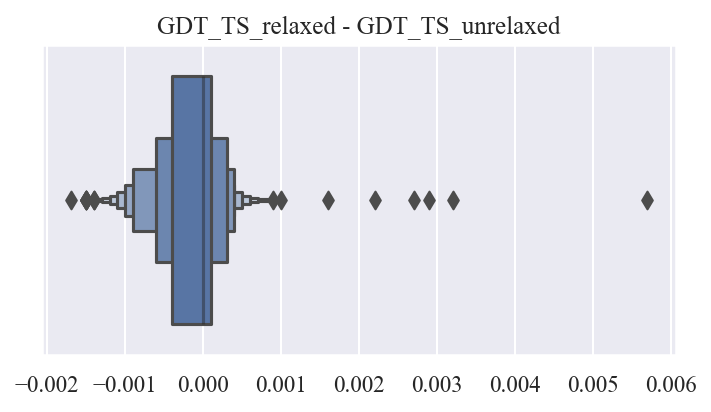

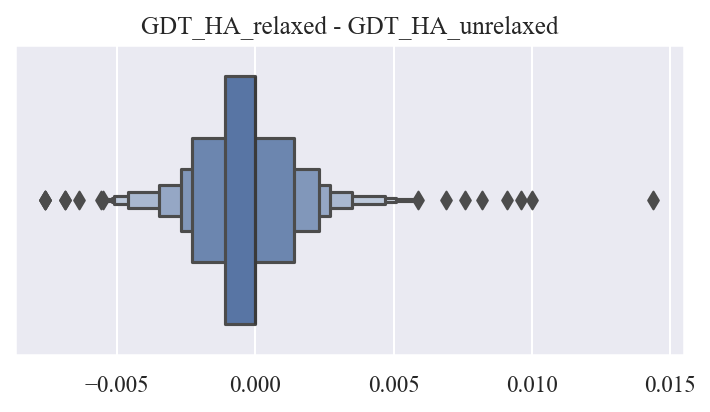

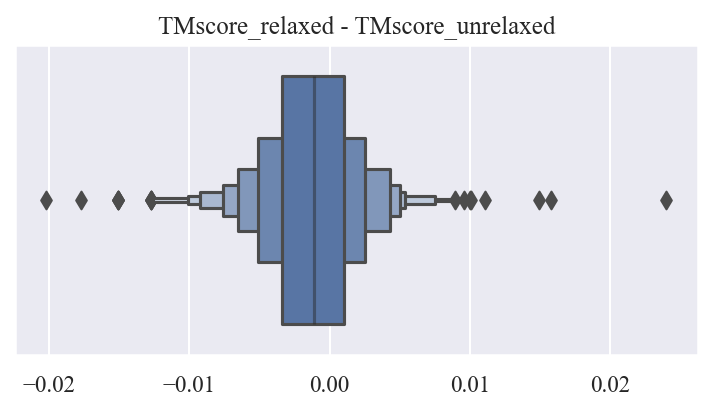

In [8]:
labels = ['GDT_TS', 'GDT_HA', 'TMscore']
for label in labels:
    plt.figure(figsize=(5, 3))
    plt.title(f'{label}_relaxed - {label}_unrelaxed')
    sns.boxenplot(x=(df[label + suffixes[0]] - df[label + suffixes[1]]).sort_values())
    plt.tight_layout()
    plt.savefig(fig_dir / f'{label}_diff.png')
    plt.show()

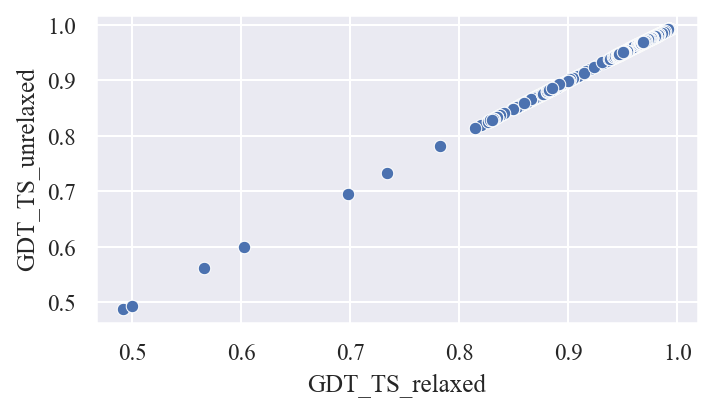

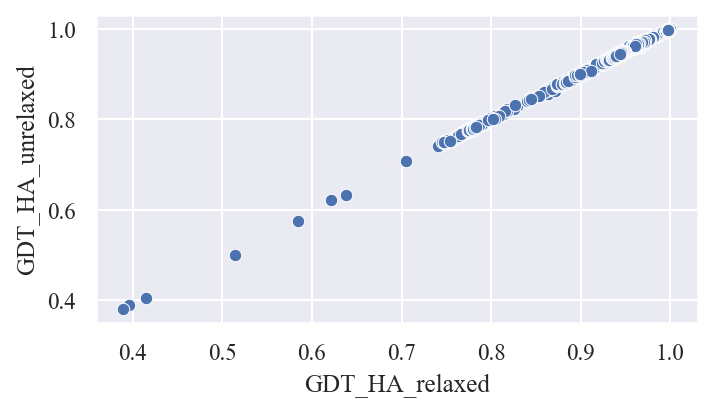

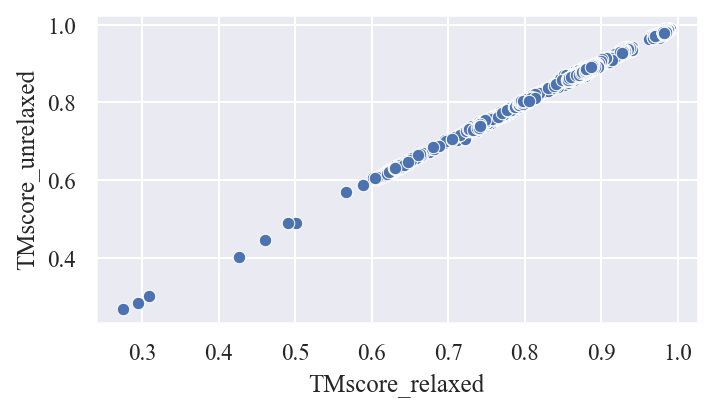

In [9]:
labels = ['GDT_TS', 'GDT_HA', 'TMscore']
for label in labels:
    plt.figure(figsize=(5, 3))
    sns.scatterplot(data=df, x=label + suffixes[0], y=label + suffixes[1])
    plt.tight_layout()
    plt.savefig(fig_dir / f'{label}_scatter.png')
    plt.show()

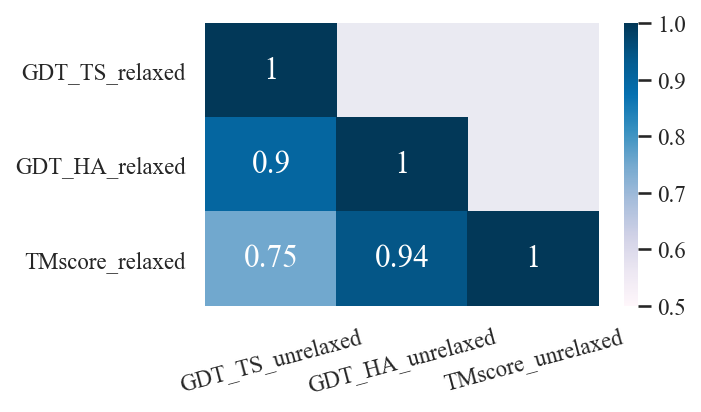

In [10]:
relaxed_columns = [label + suffixes[0] for label in labels]
unrelaxed_columns = [label + suffixes[1] for label in labels]
columns = relaxed_columns + unrelaxed_columns
data = df[columns].corr()[unrelaxed_columns].loc[relaxed_columns]
mask = np.triu(np.ones_like(data, dtype=np.bool_), k=1)
plt.figure(figsize=(5, 3))
sns.heatmap(data, mask=mask, vmin=0.5, vmax=1, annot=True, cmap='PuBu')
plt.xticks(rotation=15)
plt.tight_layout()
plt.savefig(fig_dir / 'corr_heatmap.png')